## Import standard packages and helpers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install python_rdrsegmenter

In [ ]:
from python_rdrsegmenter import load_segmenter

In [ ]:
df = pd.read_excel("all_data.xlsx")
df.head()

,Seller,Customer,Product name,Date,Rating,Review,Version,Oversea Shopping,Picture included
0,Sweet mint Official Store,hai_yen2208,Pink Coco Son kem lì,2023-04-09 17:06:07,5,"Sản phẩm okla nha mn, màu lên đúng hình trên ả...",5,no,no
1,Sweet mint Official Store,k*****5,Pink Coco Son kem lì,2023-04-17 05:44:39,1,Sản phẩm thì là vỏ ko\nKo có son bên trong\nKo...,4,no,no
2,Sweet mint Official Store,p*****7,Pink Coco Son kem lì,2023-04-20 09:32:24,5,Làm đẹp:môi\n\nGiá rẻ mà chất lượng màu cũng s...,4,no,yes
3,Sweet mint Official Store,kitanhnguyen,Pink Coco Son kem lì,2023-05-23 05:08:56,5,Hiệu ứng làm đẹp:rất là đẹp 😍\nKinh nghiệm sử ...,4,no,no
4,Sweet mint Official Store,phuongthao.alin,Pink Coco Son kem lì,2023-05-23 11:08:28,5,Hiệu ứng làm đẹp:tốt\nKinh nghiệm sử dụng:ko c...,2,no,no


# Add features to text data

In [ ]:
df_text = df[["Seller", "Review"]].copy()

In [ ]:
df_text["Review"] = df_text["Review"].str.replace(":", ": ")

In [ ]:
df_text["Review"] = df_text["Review"].str.replace("\n", " ")

In [ ]:
df_text["Review"] = df_text["Review"].str.replace(":", ": ")

In [ ]:
df_text["Review"] = df_text["Review"].str.replace(",", ", ")

In [ ]:
segmenter = load_segmenter()

In [ ]:
segmenter.tokenize("công dụng: sơn mỏ hỗn Sản phẩm okla   j nha mn, màu lên đúng   hình trên ncl moi đẹp")

'công dụng: sơn mỏ hỗn Sản_phẩm okla j nha mn, màu lên đúng hình trên ncl moi đẹp'

In [ ]:
df_text["Review_new"] = [segmenter.tokenize(str(sentence)) for sentence in df_text["Review"]]

In [ ]:
df_text["Char"] = [len(str(sentence)) for sentence in df_text["Review"]]

#### Vietnamese segmented word count

In [ ]:
df_text["Segm_count"] = [len(segmenter.tokenize(str(sentence)).split()) for sentence in df_text["Review"]]

#### Raw word count

In [ ]:
df_text["Word_count"] = [len(str(sentence).split()) for sentence in df_text["Review"]]

# Spam Traits

In [ ]:
# In Vietnamese, the character length of each syllable is at most 7 (and there is only 1 instance, which is "nghiêng")
# Logically, sentennces with Char/Wcount >= 7 or close to 7 are spam comments
df_text["Char/Wcount"] = round(df_text["Char"] / df_text["Word_count"], 2)

In [ ]:
df_text.head()

,Seller,Review,Review_new,Char,Segm_count,Word_count,Char/Wcount
0,Sweet mint Official Store,"Sản phẩm okla nha mn, màu lên đúng hình trên ...","Sản_phẩm okla nha mn, màu lên đúng hình trên ả...",74,13,15,4.93
1,Sweet mint Official Store,Sản phẩm thì là vỏ ko Ko có son bên trong Ko h...,Sản_phẩm thì là vỏ ko Ko có_son bên trong Ko h...,53,11,14,3.79
2,Sweet mint Official Store,Làm đẹp: môi Giá rẻ mà chất lượng màu cũng s...,Làm đẹp: môi Giá rẻ mà chất_lượng màu cũng siê...,75,15,16,4.69
3,Sweet mint Official Store,Hiệu ứng làm đẹp: rất là đẹp 😍 Kinh nghiệm sử...,Hiệu_ứng làm đẹp: rất là đẹp 😍 Kinh_nghiệm sử ...,68,13,16,4.25
4,Sweet mint Official Store,Hiệu ứng làm đẹp: tốt Kinh nghiệm sử dụng: k...,Hiệu_ứng làm đẹp: tốt Kinh_nghiệm sử dụng: ko ...,71,14,16,4.44


In [ ]:
spam_lower = df_text.loc[df_text["Char/Wcount"] < 3.5].sort_values(by="Char/Wcount")
spam_upper = df_text.loc[df_text["Char/Wcount"] > 5].sort_values(by="Char/Wcount")

In [ ]:
spam_mid = df_text.loc[(df_text["Char/Wcount"] > 3.5) & (df_text["Char/Wcount"] < 6) & (df_text["Word_count"] < 4)].sort_values(by="Word_count")
spam_mid.head()

,Seller,Review,Review_new,Char,Segm_count,Word_count,Char/Wcount
22396,Romand_Official Store,Ưng,Ưng,4,1,1,4.0
93969,Perfect Diary Official Shop,Okee,Okee,4,1,1,4.0
94392,Perfect Diary Official Shop,Xịn!,Xịn!,4,1,1,4.0
149431,Abpopa.vn,11đ,11đ,4,1,1,4.0
148654,Ineyoo Official Store,Đeph,Đeph,4,1,1,4.0


In [ ]:
spam_lower.head()

,Seller,Review,Review_new,Char,Segm_count,Word_count,Char/Wcount
5586,PINKFLASH Official Store,😘,😘,1,1,1,1.0
3762,PINKFLASH Official Store,s,s,1,1,1,1.0
4505,PINKFLASH Official Store,B,B,1,1,1,1.0
136918,Herorange Official Store,H,H,1,1,1,1.0
135443,Herorange Official Store,E,E,1,1,1,1.0


In [ ]:
spam_upper.head()

,Seller,Review,Review_new,Char,Segm_count,Word_count,Char/Wcount
169334,JENNY SHOPP,"Chào hỏi khách, giới thiệu chương trình ưu đã...","Chào_hỏi khách, giới_thiệu chương_trình ưu_đãi...",361,50,72,5.01
149904,Abpopa.vn,Monkey mở cửa vào thế giới những chiếc lá mới ...,Monkey mở_cửa vào thế_giới những chiếc lá mới ...,4689,793,935,5.01
139910,Herorange Official Store,I got an error when visiting heyhey.net/. Err...,I got an error when visiting heyhey.net/. Erro...,361,71,72,5.01
91312,Colorkey Official Store,"[TB] TRỌN GÓI 10K - BAO DATA, GỌI CẢ NGÀY! 1....","[TB] TRỌN_GÓI 10K - BAO DATA, GỌI CẢ NGÀY! 1. ...",336,63,67,5.01
137150,Herorange Official Store,Mẹo người dùng: tốt Bao bì: Tốt Hiệu ứng làm...,Mẹo người dùng: tốt Bao bì: Tốt_Hiệu ứng làm đ...,396,75,79,5.01


## Extract month from date in M format and time from date in hh format

In [ ]:
# GMT is shifted up 4 hours
df['Date'] = df['Date'] - pd.Timedelta(hours=4)

In [ ]:
df['Day'] = pd.to_datetime(df['Date']).dt.to_period('M')

In [ ]:
df['Time'] = pd.to_datetime(df['Date']).dt.strftime('%H')

In [ ]:
df["Weekday"] = pd.to_datetime(df['Date']).dt.day_name()

In [ ]:
df.head(3)

,Seller,Customer,Product name,Date,Rating,Review,Version,Oversea Shopping,Picture included,Day,Time,Weekday
0,Sweet mint Official Store,hai_yen2208,Pink Coco Son kem lì,2023-04-09 13:06:07,5,"Sản phẩm okla nha mn, màu lên đúng hình trên ả...",5,no,no,2023-04,13,Sunday
1,Sweet mint Official Store,k*****5,Pink Coco Son kem lì,2023-04-17 01:44:39,1,Sản phẩm thì là vỏ ko\nKo có son bên trong\nKo...,4,no,no,2023-04,01,Monday
2,Sweet mint Official Store,p*****7,Pink Coco Son kem lì,2023-04-20 05:32:24,5,Làm đẹp:môi\n\nGiá rẻ mà chất lượng màu cũng s...,4,no,yes,2023-04,05,Thursday


## After rough spam removal

In [ ]:
df_spam_fil_raw = df_text.copy()

In [ ]:
df_spam_fil_raw["Time"] = df["Time"]

In [ ]:
df_spam_fil_raw["Day"] = df["Day"]

In [ ]:
df_spam_fil_raw["Weekday"] = df["Weekday"]

In [ ]:
df_spam_fil_raw["Rating"] = df["Rating"]

In [ ]:
df_spam_fil_raw = df_spam_fil_raw.loc[(df_text["Char/Wcount"] > 3.5) & (df_text["Char/Wcount"] < 5) & (df_text["Word_count"] > 6)].copy()

### remove reviews with words having more than 7 characters

In [ ]:
def filter_spam(review):
    words = review.split()
    long_words = [long for long in words if len(long) > 7]
    return len(long_words) == 0

df_spam_fil_raw = df_spam_fil_raw[df_spam_fil_raw['Review'].apply(filter_spam)]

### remove reviews containing "(tính chất) minh họa" or "(tính chất) nhận xu"

In [ ]:
def coin_review(review):
    if "minh họa" in str(review) or "nhận xu" in str(review):
        return False
    return True

df_spam_fil_raw = df_spam_fil_raw[df_spam_fil_raw['Review'].apply(coin_review)]

# Data for spam review analysis

In [ ]:
df_spam_fil_raw.reset_index(inplace=True)

In [ ]:
df_spam_fil_raw.drop(columns=["index"], inplace=True)

In [ ]:
# df_spam_fil_raw.to_excel("text_data.xlsx")

## Roughly replace abbreviations and remove stop words

In [ ]:
from vnmese_slang import abbreviations
from vnmese_slang import common_typos
from vnmese_slang import synonyms

In [ ]:
def string_clean(review):
    words = str(review).lower().replace(",", " ").replace(".", " ").split()

    def clean_abb():
        for i in range(len(words)):
            if words[i] in abbreviations:
                words[i] = abbreviations[words[i]]
        new_abb = " ".join(words)
        return new_abb

    def clean_typo():
        for i in range(len(words)):
            if words[i] in common_typos:
                words[i] = common_typos[words[i]]
        new_typo = " ".join(words)
        return new_typo

    def clean_syn():
        for i in range(len(words)):
            if words[i] in synonyms:
                words[i] = synonyms[words[i]]
        new_syn = " ".join(words)
        return new_syn

    # Apply all cleaning functions
    cleaned_review = coin_review()
    cleaned_review = greater_than_7()
    cleaned_review = clean_abb()
    cleaned_review = clean_typo()
    cleaned_review = clean_syn()

    return cleaned_review

df_spam_fil_raw['Review'] = df_spam_fil_raw['Review'].apply(string_clean)

In [ ]:
def no_exp_review(review):
    if "chưa có" in str(review) or "chưa biết" in str(review) or "chưa dùng" in str(review):
        return False
    return True

df_spam_fil_raw = df_spam_fil_raw[df_spam_fil_raw['Review'].apply(no_exp_review)]

In [ ]:
df_spam_fil_raw.head()

,Seller,Review,Review_new,Char,Segm_count,Word_count,Char/Wcount,Time,Day,Weekday,Rating
0,Sweet mint Official Store,sản phẩm ok nha mọi người màu lên đúng hình tr...,"Sản_phẩm okla nha mn, màu lên đúng hình trên ả...",74,13,15,4.93,13,2023-04,Sunday,5
1,Sweet mint Official Store,sản phẩm thì là vỏ không không có son bên tron...,Sản_phẩm thì là vỏ ko Ko có_son bên trong Ko h...,53,11,14,3.79,01,2023-04,Monday,1
2,Sweet mint Official Store,làm đẹp: môi giá rẻ mà chất lượng màu cũng siê...,Làm đẹp: môi Giá rẻ mà chất_lượng màu cũng siê...,75,15,16,4.69,05,2023-04,Thursday,5
3,Sweet mint Official Store,hiệu ứng làm đẹp: rất là đẹp 😍 kinh nghiệm sử ...,Hiệu_ứng làm đẹp: rất là đẹp 😍 Kinh_nghiệm sử ...,68,13,16,4.25,01,2023-05,Tuesday,5
4,Sweet mint Official Store,hiệu ứng làm đẹp: tốt kinh nghiệm sử dụng: khô...,Hiệu_ứng làm đẹp: tốt Kinh_nghiệm sử dụng: ko ...,71,14,16,4.44,07,2023-05,Tuesday,5


In [ ]:
df_spam_fil_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157224 entries, 0 to 161504
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype    
---  ------       --------------   -----    
 0   Seller       157224 non-null  object   
 1   Review       157224 non-null  object   
 2   Review_new   157224 non-null  object   
 3   Char         157224 non-null  int64    
 4   Segm_count   157224 non-null  int64    
 5   Word_count   157224 non-null  int64    
 6   Char/Wcount  157224 non-null  float64  
 7   Time         157224 non-null  object   
 8   Day          157224 non-null  period[M]
 9   Weekday      157224 non-null  object   
 10  Rating       157224 non-null  int64    
dtypes: float64(1), int64(4), object(5), period[M](1)
memory usage: 14.4+ MB


# Temporal analysis of reviews

## Number of comments per weekday - Cummulative

The number of comments in each weekday is surprisingly quite uniform

In [ ]:
x0 = df_spam_fil_raw["Weekday"].unique()
y0 = df_spam_fil_raw["Weekday"].value_counts()
x1 = df["Weekday"].unique()
y1 = df["Weekday"].value_counts()

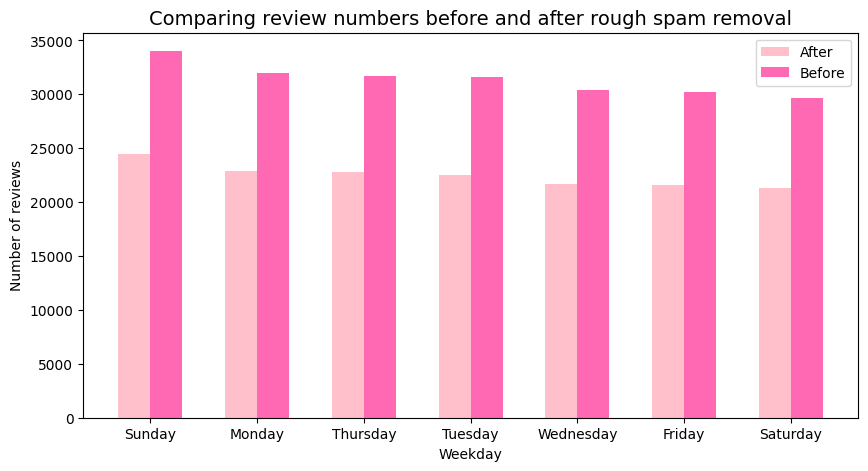

In [ ]:
bar_width = 0.3

r1 = np.arange(len(x0))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 5))

plt.bar(r1, y0, color='pink', width=bar_width, label='After')
plt.bar(r2, y1, color='hotpink', width=bar_width, label='Before')
plt.xlabel('Weekday')
plt.ylabel('Number of reviews')
plt.xticks([r + bar_width/2 for r in range(len(x0))], x0)

plt.legend()
plt.title('Comparing review numbers before and after rough spam removal', fontsize=14)
plt.show()

## Number of comments per month

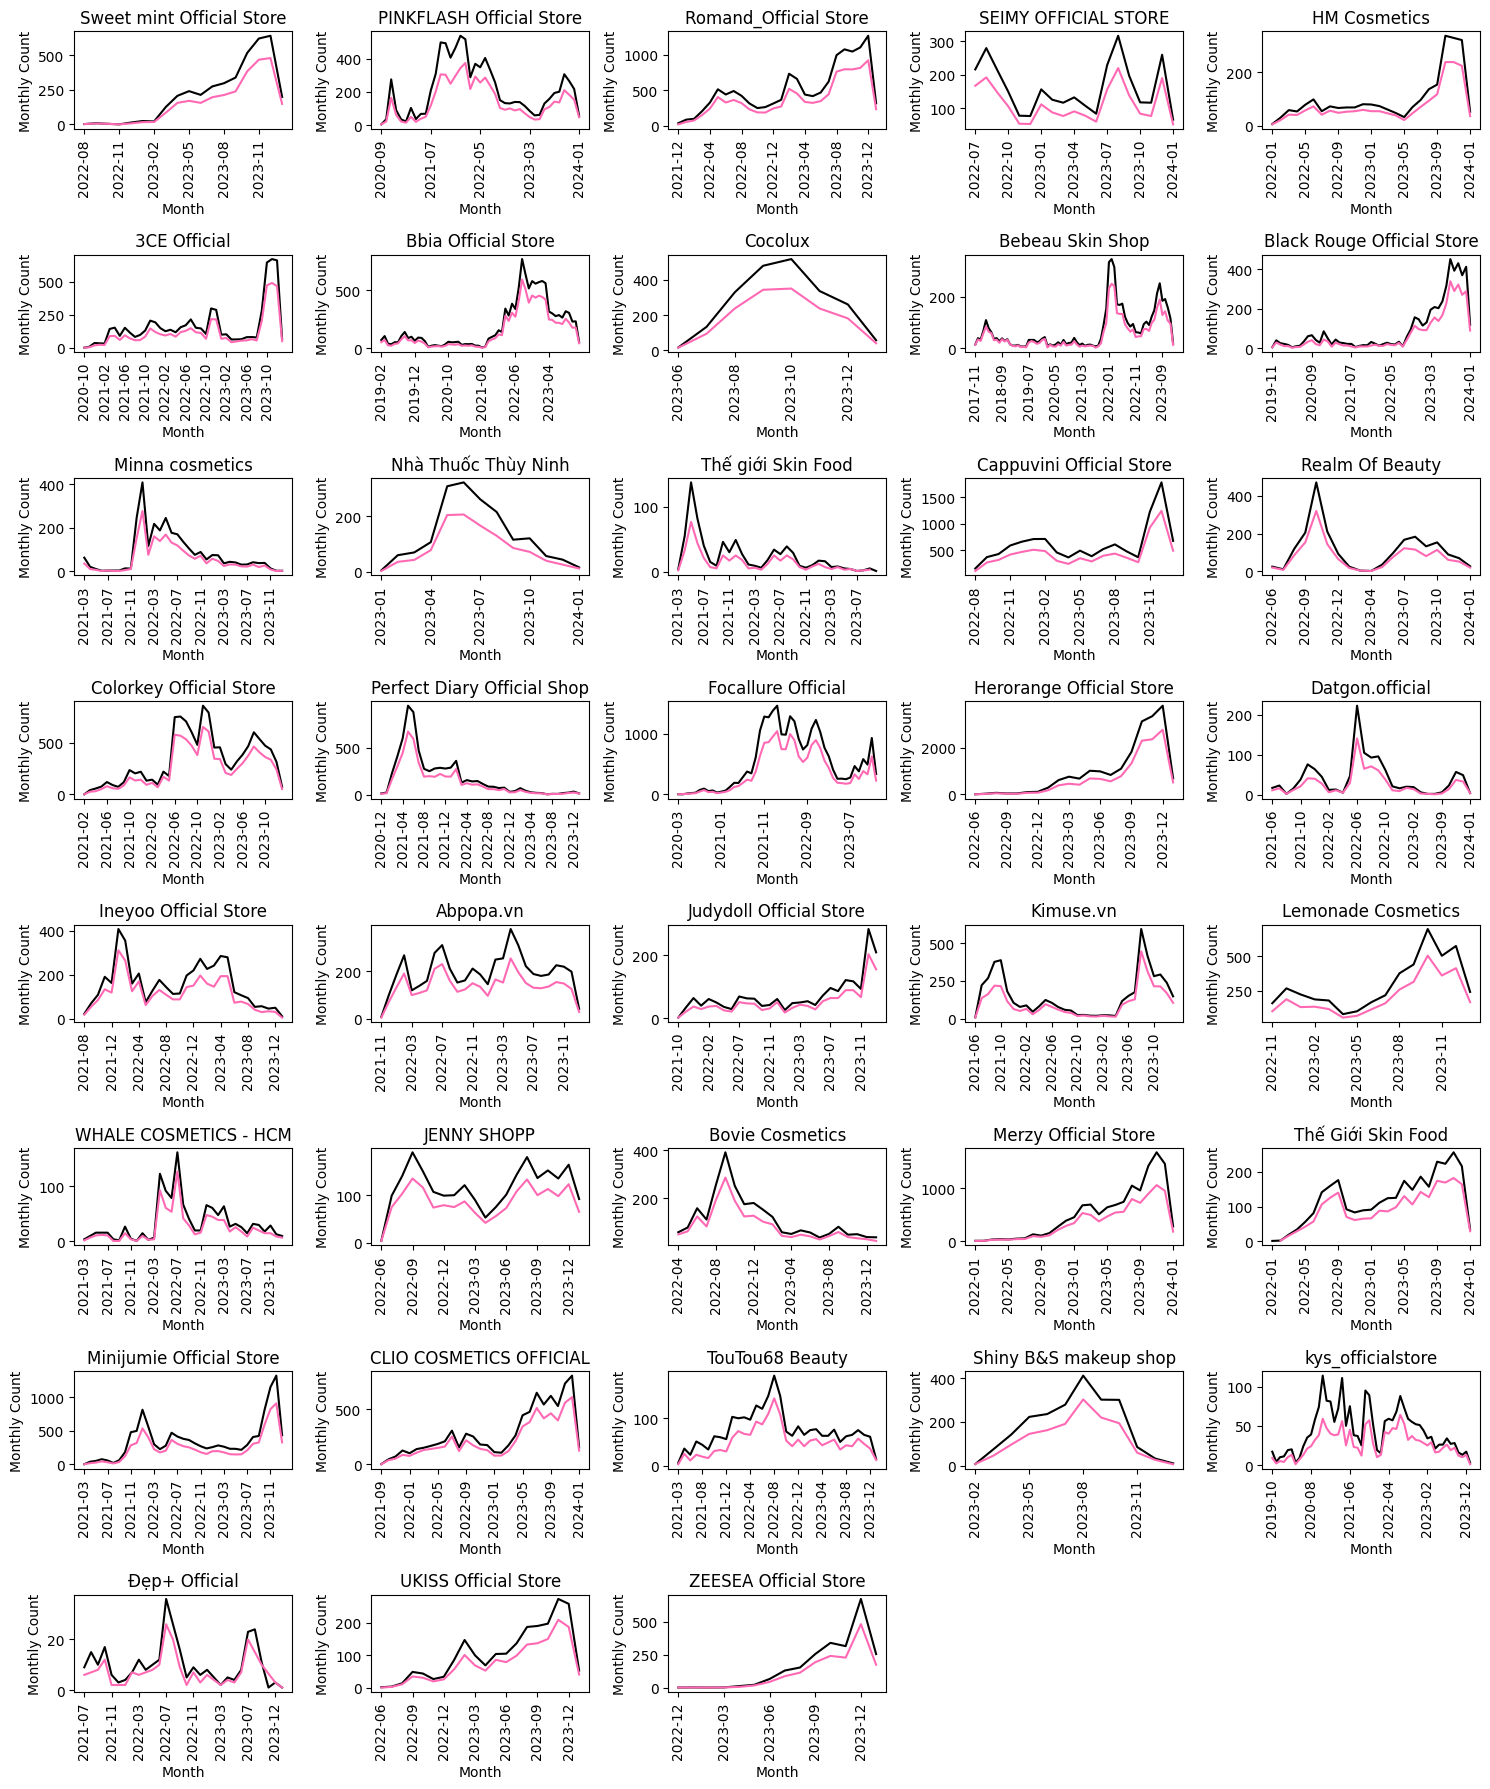

In [ ]:
seller = df["Seller"].unique()
date_count_old = df.groupby("Seller")["Day"].value_counts()
date_count_new = df_spam_fil_raw.groupby("Seller")["Day"].value_counts()

fig, axes = plt.subplots(ncols=5, nrows=8, figsize=(15, 18))
axes = axes.flatten()

for i, val in enumerate(seller):
    ax = axes[i]
    ax.set_title(f'{val}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Monthly Count')

    if len(date_count_old[val]) <= 10:
        tick_interval = 2
    elif 10 < len(date_count_old[val]) <= 20:
        tick_interval = 3
    elif 20 <= len(date_count_old[val]) < 40:
        tick_interval = 4
    elif 40 < len(date_count_old[val]):
        tick_interval = 10

    if val in date_count_old.index.levels[0]:
        count_old = date_count_old[val].sort_index()
        count_new = date_count_new[val].sort_index()
        x = [str(index) for index in count_old.index]
        y = [str(index) for index in count_new.index]
        ax.plot(x, count_old.values, color="black", label="Before")
        ax.plot(y, count_new.values, color="hotpink", label="After")

        xticks_indices = range(0, len(count_old), tick_interval)
        ax.set_xticks(xticks_indices)
        ax.set_xticklabels([x[i] for i in xticks_indices], rotation=90)

for ax in axes[len(seller):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Number of comments per hour after rough processing

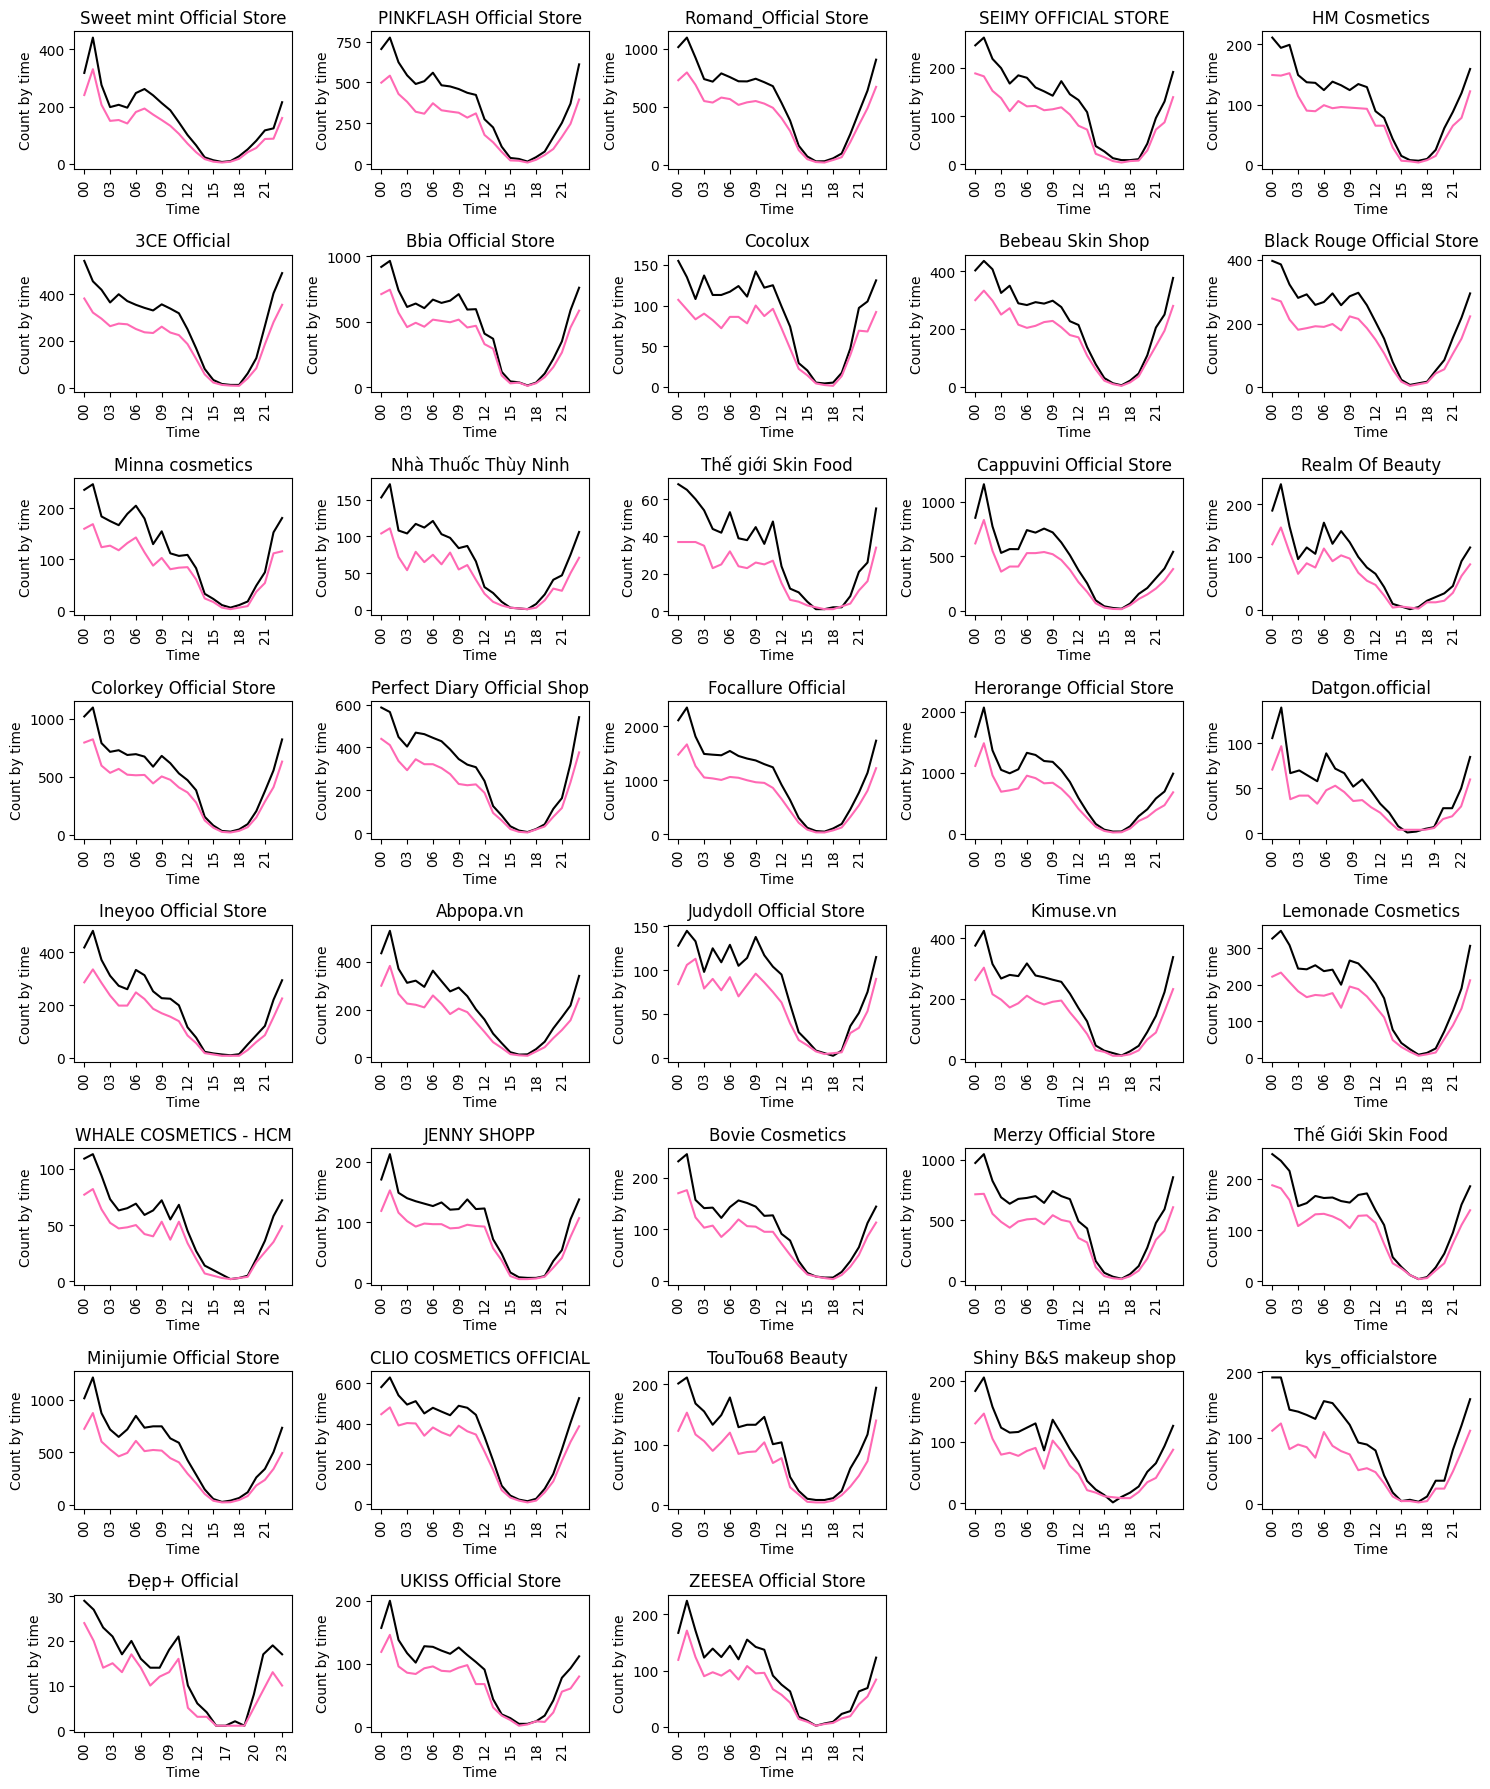

In [ ]:
seller = df_spam_fil_raw["Seller"].unique()
time_count_new = df_spam_fil_raw.groupby("Seller")["Time"].value_counts()
time_count_old = df.groupby("Seller")["Time"].value_counts()

fig, axes = plt.subplots(ncols=5, nrows=8, figsize=(15, 18))
axes = axes.flatten()

tick_interval = 3

for i, val in enumerate(seller):
    ax = axes[i]
    ax.set_title(f'{val}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Count by time')

    if val in time_count_old.index.levels[0]:
        count_new = time_count_new[val].sort_index()
        count_old = time_count_old[val].sort_index()
        x = [str(index) for index in count_old.index]
        y = [str(index) for index in count_new.index]
        ax.plot(x, count_old.values, color="black")
        ax.plot(y, count_new.values, color="hotpink")

        xticks_indices = range(0, len(count_old), tick_interval)
        ax.set_xticks(xticks_indices)
        ax.set_xticklabels([x[i] for i in xticks_indices], rotation=90)

for ax in axes[len(seller):]:
    ax.axis('off')

plt.tight_layout()
plt.show()